In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(R"C:\Users\nidhi\Downloads\training_data_disease_classification.csv")
df.rename(columns = {'prognosis':'class'}, inplace = True)
print(df.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

In [3]:
classes = df['class'].unique()
num_classes = len(classes)
dummy_class = []
mapper = {}
for i, cl in enumerate(classes):
    mapper[cl] = i
    dummy_class.append(f"class_{i}")

In [4]:
mapper

{'Fungal infection': 0,
 'Allergy': 1,
 'GERD': 2,
 'Chronic cholestasis': 3,
 'Drug Reaction': 4,
 'Peptic ulcer diseae': 5,
 'AIDS': 6,
 'Diabetes ': 7,
 'Gastroenteritis': 8,
 'Bronchial Asthma': 9,
 'Hypertension ': 10,
 'Migraine': 11,
 'Cervical spondylosis': 12,
 'Paralysis (brain hemorrhage)': 13,
 'Jaundice': 14,
 'Malaria': 15,
 'Chicken pox': 16,
 'Dengue': 17,
 'Typhoid': 18,
 'hepatitis A': 19,
 'Hepatitis B': 20,
 'Hepatitis C': 21,
 'Hepatitis D': 22,
 'Hepatitis E': 23,
 'Alcoholic hepatitis': 24,
 'Tuberculosis': 25,
 'Common Cold': 26,
 'Pneumonia': 27,
 'Dimorphic hemmorhoids(piles)': 28,
 'Heart attack': 29,
 'Varicose veins': 30,
 'Hypothyroidism': 31,
 'Hyperthyroidism': 32,
 'Hypoglycemia': 33,
 'Osteoarthristis': 34,
 'Arthritis': 35,
 '(vertigo) Paroymsal  Positional Vertigo': 36,
 'Acne': 37,
 'Urinary tract infection': 38,
 'Psoriasis': 39,
 'Impetigo': 40}

In [5]:
df = df.replace(mapper)
df = pd.get_dummies(df, columns=['class'])

In [6]:
# Splitting data to train and valid
train_df = df.sample(frac=0.70, random_state=1)   #sample shuffles the rows in the database
valid_df = df.drop(train_df.index)

In [7]:
train_df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,class_31,class_32,class_33,class_34,class_35,class_36,class_37,class_38,class_39,class_40
2025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1724,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4500,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2213,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3291,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1139,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_labels_df = pd.concat([train_df.pop(dc) for dc in dummy_class], axis=1)
valid_labels_df = pd.concat([valid_df.pop(dc) for dc in dummy_class], axis=1)

In [9]:
train_labels_df.shape

(3444, 41)

In [11]:
# Converting to numpy
train_data = train_df.to_numpy()
valid_data = valid_df.to_numpy()
train_data.shape

(3444, 132)

In [12]:
train_labels = train_labels_df.to_numpy()
valid_labels = valid_labels_df.to_numpy()

In [13]:
train_labels.shape

(3444, 41)

In [14]:
# Storing data for future prediction
prediction_data = train_df.iloc[0]
result = train_labels_df.iloc[0]

In [15]:
# Prepare dataset
def prepare_dataset(data, labels, batch, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices((data, labels))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.batch(batch).prefetch(1)
    return dataset

In [16]:
# training and valida dataset
batch_size = 128
buffer = 32
train_dataset = prepare_dataset(train_data, train_labels, batch_size, buffer)
valid_dataset = prepare_dataset(valid_data, valid_labels, batch_size, buffer)

In [17]:
train_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
train_labels

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [20]:
# Build Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [21]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy', 'mae']
)

In [22]:
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=valid_dataset
)

Epoch 1/500
27/27 [==============================] - 1s 15ms/step - loss: 3.7236 - accuracy: 0.0441 - mae: 0.0476 - val_loss: 3.7231 - val_accuracy: 0.0413 - val_mae: 0.0476
Epoch 2/500
27/27 [==============================] - 0s 6ms/step - loss: 3.7110 - accuracy: 0.0491 - mae: 0.0476 - val_loss: 3.7111 - val_accuracy: 0.0440 - val_mae: 0.0476
Epoch 3/500
27/27 [==============================] - 0s 6ms/step - loss: 3.6989 - accuracy: 0.0491 - mae: 0.0476 - val_loss: 3.6995 - val_accuracy: 0.0440 - val_mae: 0.0476
Epoch 4/500
27/27 [==============================] - 0s 6ms/step - loss: 3.6868 - accuracy: 0.0491 - mae: 0.0476 - val_loss: 3.6879 - val_accuracy: 0.0440 - val_mae: 0.0476
Epoch 5/500
27/27 [==============================] - 0s 7ms/step - loss: 3.6750 - accuracy: 0.0502 - mae: 0.0475 - val_loss: 3.6767 - val_accuracy: 0.0481 - val_mae: 0.0475
Epoch 6/500
27/27 [==============================] - 0s 8ms/step - loss: 3.6635 - accuracy: 0.0508 - mae: 0.0475 - val_loss: 3.6658 - 

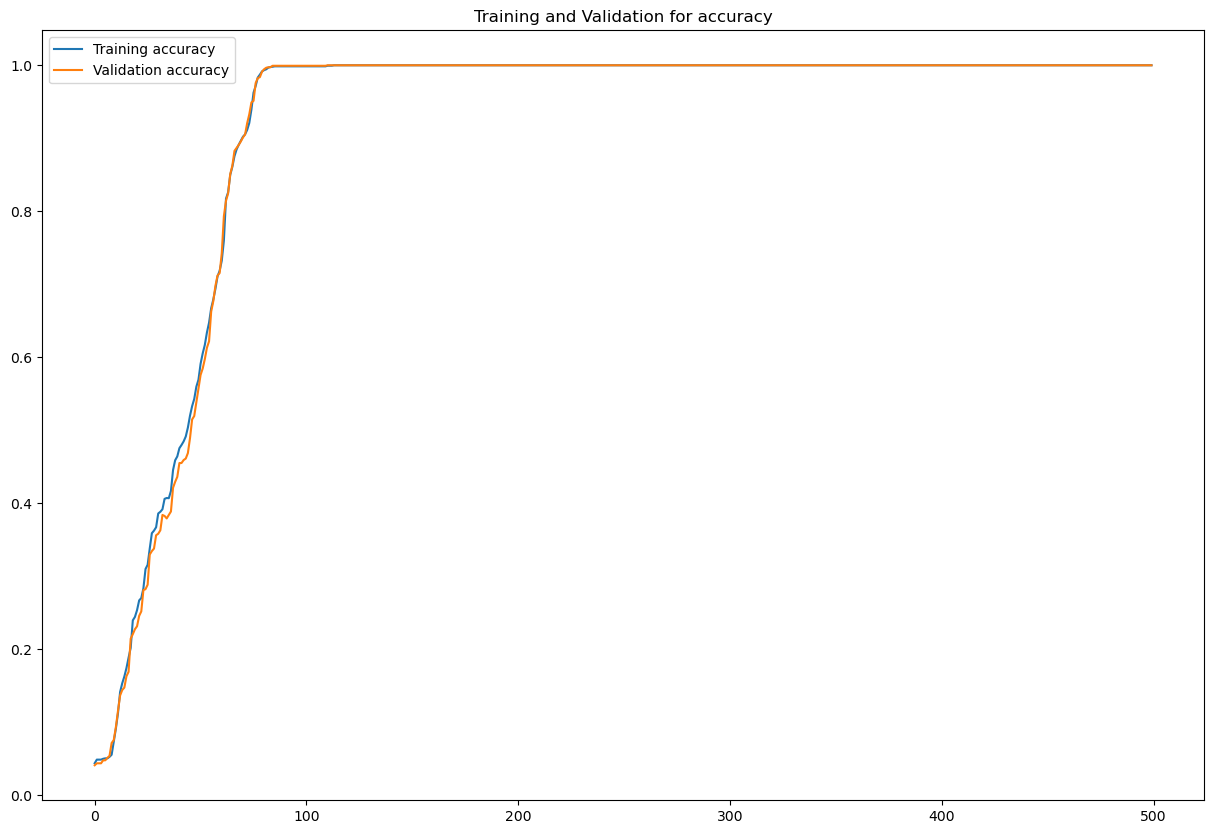

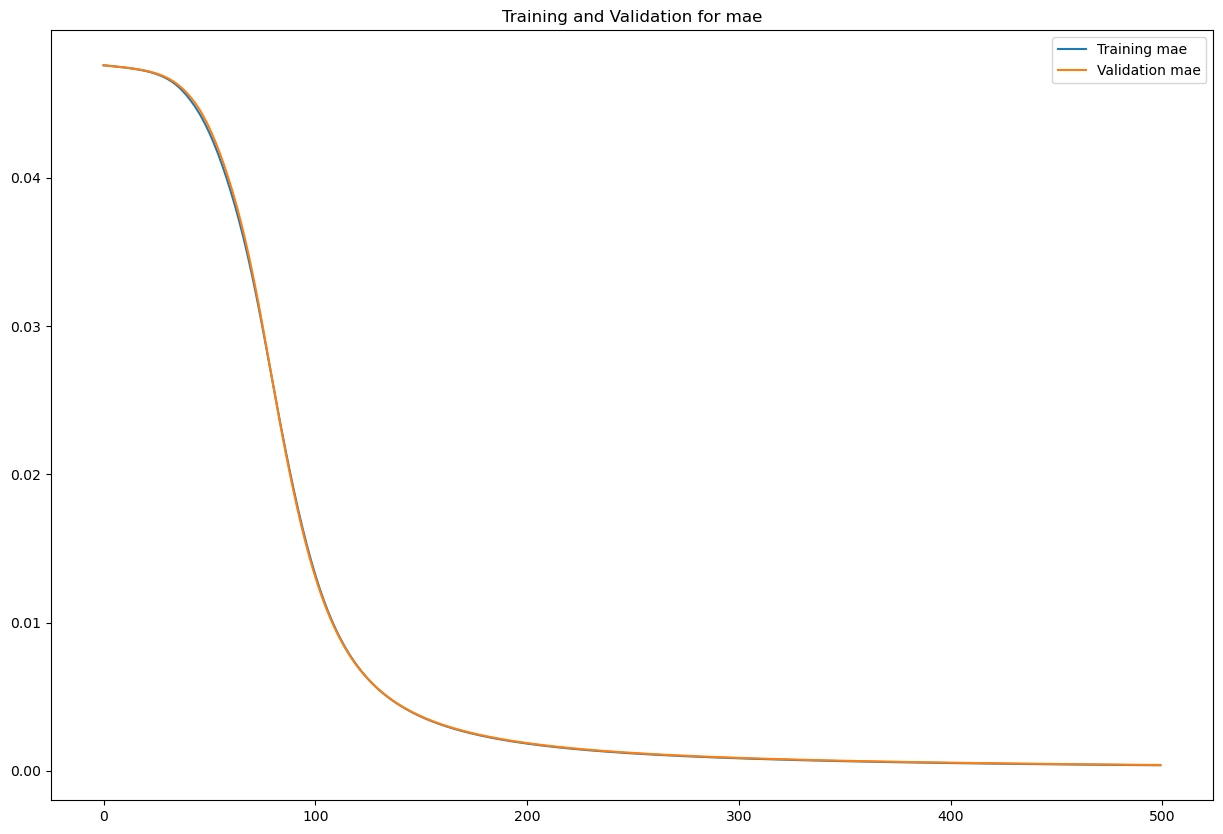

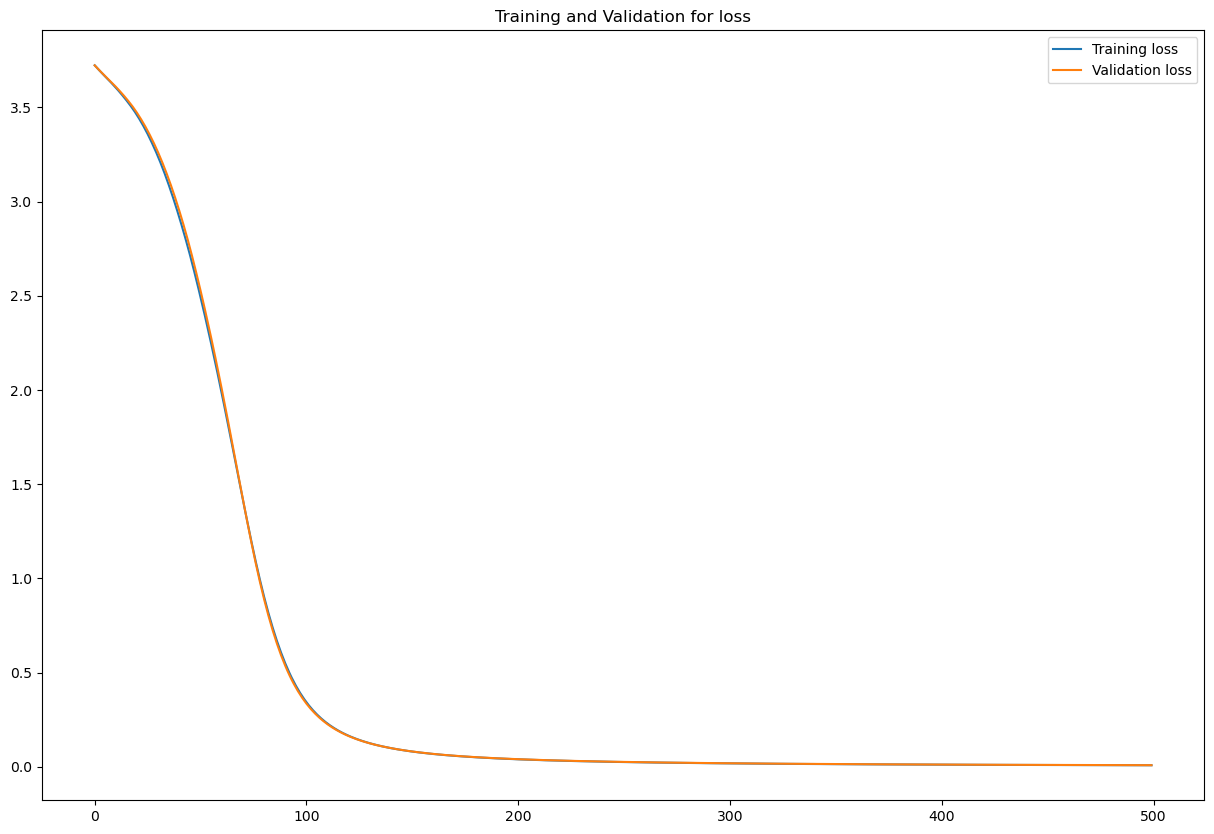

In [23]:
# plotting Graphs
plots = ['accuracy', 'mae', 'loss']
for plot in plots:
    metric = history.history[plot]
    val_metric = history.history[f"val_{plot}"]
    epochs = range(len(metric))

    plt.figure(figsize=(15, 10))
    plt.plot(epochs, metric, label=f"Training {plot}")
    plt.plot(epochs, val_metric, label=f"Validation {plot}")
    plt.legend()
    plt.title(f"Training and Validation for {plot}")
    plt.show()

In [24]:
prediction_data = prediction_data.values[np.newaxis]
prediction = model.predict(prediction_data)
print(f"Expected Result: {np.argmax(result)}, Prediction Result: {np.argmax(prediction)}")

1/1 [==============================] - 0s 127ms/step
Expected Result: 38, Prediction Result: 38


In [25]:
index = 1
prediction_data = train_df.iloc[index]
result = train_labels_df.iloc[index]
prediction_data = prediction_data.values[np.newaxis]
prediction = model.predict(prediction_data)
print(f"Expected Result: {np.argmax(result)}, Prediction Result: {np.argmax(prediction)}")

1/1 [==============================] - 0s 31ms/step
Expected Result: 8, Prediction Result: 8


In [26]:
index = 3
prediction_data = train_df.iloc[index]
result = train_labels_df.iloc[index]
prediction_data = prediction_data.values[np.newaxis]
prediction = model.predict(prediction_data)
print(f"Expected Result: {np.argmax(result)}, Prediction Result: {np.argmax(prediction)}")


1/1 [==============================] - 0s 17ms/step
Expected Result: 16, Prediction Result: 16


In [27]:
index = 5
prediction_data = train_df.iloc[index]
result = train_labels_df.iloc[index]
prediction_data = prediction_data.values[np.newaxis]
prediction = model.predict(prediction_data)
print(f"Expected Result: {np.argmax(result)}, Prediction Result: {np.argmax(prediction)}")


1/1 [==============================] - 0s 34ms/step
Expected Result: 11, Prediction Result: 11


In [28]:
index = 4
prediction_data = train_df.iloc[index]
result = train_labels_df.iloc[index]
prediction_data = prediction_data.values[np.newaxis]
prediction = model.predict(prediction_data)
print(f"Expected Result: {np.argmax(result)}, Prediction Result: {np.argmax(prediction)}")

1/1 [==============================] - 0s 31ms/step
Expected Result: 12, Prediction Result: 12


In [29]:
index = 10
prediction_data = train_df.iloc[index]
result = train_labels_df.iloc[index]
prediction_data = prediction_data.values[np.newaxis]
prediction = model.predict(prediction_data)
print(f"Expected Result: {np.argmax(result)}, Prediction Result: {np.argmax(prediction)}")

1/1 [==============================] - 0s 16ms/step
Expected Result: 32, Prediction Result: 32


In [40]:
df_test = pd.read_csv(R"C:\Users\nidhi\Downloads\Testing.csv")
df_test.rename(columns = {'prognosis':'class'}, inplace = True)
print(df_test.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

In [41]:
df_test = df_test.replace(mapper)
df_test = pd.get_dummies(df_test, columns=['class'])

In [43]:
df_test

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,class_31,class_32,class_33,class_34,class_35,class_36,class_37,class_38,class_39,class_40
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
test_labels_df = pd.concat([df_test.pop(dc) for dc in dummy_class], axis=1)

In [45]:
test_data = df_test.to_numpy()

In [46]:
test_labels = test_labels_df.to_numpy()

In [47]:
test_dataset = prepare_dataset(test_data, test_labels, batch_size, buffer)

In [48]:
model.evaluate(test_dataset)

1/1 [==============================] - 0s 29ms/step - loss: 0.0169 - accuracy: 1.0000 - mae: 6.5325e-04


[0.0168633870780468, 1.0, 0.0006532535189762712]

In [50]:
inverse_mapper = {v: k for k, v in mapper.items()}

In [51]:
index = 10
prediction_data = df_test.iloc[index]
result = test_labels_df.iloc[index]
prediction_data = prediction_data.values[np.newaxis]
prediction = model.predict(prediction_data)
print(f"Expected Result: {np.argmax(result)}, Prediction Result: {np.argmax(prediction)}")
disease = inverse_mapper.get(np.argmax(prediction))
print("Disease Predicted: ", disease)

1/1 [==============================] - 0s 49ms/step
Expected Result: 10, Prediction Result: 10
Disease Predicted:  Hypertension 
